In [1]:
import pandas as pd
import numpy as np

In [2]:
#!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
print(pd.__version__)

1.5.3


### This is covid data during 1st phase in India. I would like to analyse the data and perform exploratory data analysis

In [5]:
file_path = "E:\Richa\projects\data_anaysis_covid\covid_data.csv"
df = pd.read_csv(file_path)

In [6]:
df

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,30-01-2020,Kerala,1,0,0,0,0,0
1,31-01-2020,Kerala,1,0,0,0,0,0
2,01-02-2020,Kerala,2,0,0,1,0,0
3,02-02-2020,Kerala,3,0,0,1,0,0
4,03-02-2020,Kerala,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4687,06-08-2020,Telangana,73050,589,52103,2092,0,1289
4688,06-08-2020,Tripura,5725,31,3793,97,0,68
4689,06-08-2020,Uttar Pradesh,104388,1857,60558,4078,0,3287
4690,06-08-2020,Uttarakhand,8254,98,5233,246,0,386


In [7]:
df.shape

(4692, 8)

In [8]:
df.sample(20)

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
1581,04-05-2020,Odisha,162,1,56,5,0,0
750,08-04-2020,Madhya Pradesh,229,13,0,64,0,0
1151,21-04-2020,Goa,7,0,7,0,0,0
4127,21-07-2020,Odisha,18110,97,12910,673,0,457
3942,16-07-2020,Himachal Pradesh,1341,11,979,32,0,28
218,19-03-2020,Rajasthan,7,0,3,3,0,0
4535,02-08-2020,Madhya Pradesh,32614,876,22969,808,0,698
139,14-03-2020,Maharashtra,14,0,0,3,0,0
4546,02-08-2020,Tamil Nadu,251738,4034,190966,5879,0,7010
1095,19-04-2020,Ladakh,18,0,14,0,0,0


In [9]:
df.describe()

,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4692.000000,4692.000000,4692.000000,4692.0,4692.000000
mean,11393.925192,6908.130648,418.643009,0.0,283.069054
std,37208.600846,23390.671258,1259.748923,0.0,947.925811
min,1.000000,0.000000,0.000000,0.0,-1.000000
25%,39.000000,9.000000,1.000000,0.0,0.000000
50%,619.000000,197.500000,26.000000,0.0,8.000000
75%,5233.000000,2736.000000,210.250000,0.0,119.000000
max,468265.000000,305521.000000,18366.000000,0.0,13401.000000


#### Describe function gives a basic review of data. It gives valuable insights as well. Here, We could see that New deaths data is always 0. We can remove this column as we don't get insights about it.
#### Maximum new cases in a day for one of the state is around 18k.

In [10]:
df.drop(columns = 'New deaths', inplace=True)  #droping a column

#### In the process of Data Cleaning, we need to check the null value, duplicate rows/columns, data type of each column.

In [11]:
df.isnull().sum()

Date                         0
Name of State / UT           0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New recovered                0
dtype: int64

#### There is no null value in this dataframe

In [12]:
df.duplicated().sum()

0

#### There is no duplicate value in the rows

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       4692 non-null   object
 1   Name of State / UT         4692 non-null   object
 2   Total Confirmed cases      4692 non-null   int64 
 3   Death                      4692 non-null   object
 4   Cured/Discharged/Migrated  4692 non-null   int64 
 5   New cases                  4692 non-null   int64 
 6   New recovered              4692 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 256.7+ KB


In [14]:
#Trying to change format of date
df['Date'] = pd.to_datetime(df['Date'], format ='%d-%m-%y')

ValueError: unconverted data remains: 20

#### We got error. It shows that dates are in different formats

In [15]:
#Handling both formats of year
for i in range(len(df)):
    try:
        df.at[i,'Date'] = pd.to_datetime(df.at[i,'Date'], format = '%d-%m-%y')
    except ValueError:
        df.at[i,'Date'] = pd.to_datetime(df.at[i,'Date'], format = '%d-%m-%Y')
print(df['Date'])

0       2020-01-30 00:00:00
1       2020-01-31 00:00:00
2       2020-02-01 00:00:00
3       2020-02-02 00:00:00
4       2020-02-03 00:00:00
               ...         
4687    2020-08-06 00:00:00
4688    2020-08-06 00:00:00
4689    2020-08-06 00:00:00
4690    2020-08-06 00:00:00
4691    2020-08-06 00:00:00
Name: Date, Length: 4692, dtype: object


#### We also saw that dtype of death is object, we need to change this so that we can do calculation on them.

In [16]:
#Changing death dtype to integer
df['Death'] = df['Death'].astype(np.int64)

ValueError: invalid literal for int() with base 10: '0#'

#### We found that there is at least one row in which the cell contains '0#'. As a data cleaning process, we need to check the row number and replace it with '0', after that we will change the dtype of column 'Death'.

In [17]:
count=0
for i in list(df.Death):
    try:
        integer=int(i)
        count+=1
    except:
        print("error for row: ",count)
        count+=1

error for row:  2241


In [18]:
df["Death"][2241]

'0#'

In [19]:
df.loc[2241,"Death"]="0" #Replacing the value by 0

In [20]:
df['Death'] = df['Death'].astype(np.int64)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       4692 non-null   object
 1   Name of State / UT         4692 non-null   object
 2   Total Confirmed cases      4692 non-null   int64 
 3   Death                      4692 non-null   int64 
 4   Cured/Discharged/Migrated  4692 non-null   int64 
 5   New cases                  4692 non-null   int64 
 6   New recovered              4692 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 256.7+ KB


# Analysing Data from Dataframes

#### Q. What is the total number of deaths reported in India till 6th August 2020?

In [22]:
total_death = df.Death.sum()
print (f'The total number of death is {total_death} in 1st phase of covid till 6th Aug 2020.')

The total number of death is 1366398 in 1st phase of covid till 6th Aug 2020.


#### Q. What is the total number of new cases reported in India till 6th August 2020?

In [23]:
total_cases = df['New cases'].sum()

In [24]:
print(f'The number of reported cases is {total_cases} and reported deaths is {total_death}')

The number of reported cases is 1964273 and reported deaths is 1366398


#### Q. What is the overall death rate(ratio of reported deaths to reported cases)?

In [25]:
death_rate = df['Death'].sum() / df['New cases'].sum()

In [26]:
death_rate

0.6956253025928677

In [27]:
print("The overall reported death rate in India till 6th August 2020 is {:.2f} %.".format(death_rate))

The overall reported death rate in India till 6th August 2020 is 0.70 %.


#### Q. What is the total number of CDM cases rate (ratio of Cured/Discharged/Migrated to new cases)?

In [28]:
CDM_rate = df['Cured/Discharged/Migrated'].sum() / df['New cases'].sum()

In [29]:
print("The overall reported CDM rate in India till 6th August 2020 is {:.2f} %.".format(CDM_rate))

The overall reported CDM rate in India till 6th August 2020 is 16.50 %.


# Querying and sorting rows 

#### Let's say we only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [30]:
high_cases_df = df[df['New cases']>1000]

In [31]:
high_cases_df

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
1513,2020-05-02 00:00:00,Maharashtra,11506,485,1879,1008,106
1609,2020-05-05 00:00:00,Maharashtra,14541,583,2465,1567,350
1675,2020-05-07 00:00:00,Maharashtra,16758,651,3094,1233,275
1708,2020-05-08 00:00:00,Maharashtra,17974,694,3301,1216,207
1741,2020-05-09 00:00:00,Maharashtra,19063,731,3470,1089,169
...,...,...,...,...,...,...,...
4681,2020-08-06 00:00:00,Odisha,39018,225,25738,1337,1255
4686,2020-08-06 00:00:00,Tamil Nadu,273460,4461,214815,5175,6031
4687,2020-08-06 00:00:00,Telangana,73050,589,52103,2092,1289
4689,2020-08-06 00:00:00,Uttar Pradesh,104388,1857,60558,4078,3287


#### It means there are 478 days in which new cases is greater than 1000.

# Sorting rows using column values

#### The rows can also be sorted by a specific column using .sort_values . Let's sort to identify the days with the highest number of cases, then chain it with the head method to get the 10 days with the most cases.

In [32]:
df.sort_values(by='New cases', ascending = False).head(10)

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
4307,2020-07-26 00:00:00,West Bengal,56377,1332,35654,18366,13401
4019,2020-07-18 00:00:00,Maharashtra,292589,11452,160357,16949,7744
3599,2020-07-05 00:00:00,Maharashtra,200064,8671,108082,13438,6910
3634,2020-07-07 00:00:00,Maharashtra,211987,9026,115262,11923,7180
4466,2020-07-31 00:00:00,Maharashtra,411798,14729,248615,11147,8860
4190,2020-07-23 00:00:00,Maharashtra,337607,12556,187769,10576,5552
3529,2020-07-02 00:00:00,Maharashtra,180298,8053,93154,10415,4194
4483,2020-08-01 00:00:00,Andhra Pradesh,140933,1349,63864,10376,3840
4501,2020-08-01 00:00:00,Maharashtra,422118,14994,256158,10320,7543
4676,2020-08-06 00:00:00,Maharashtra,468265,16476,305521,10309,6165


#### It looks like in the month of july, Maharashtra had seen the highest number of new cases. 
#### Let's compare this to the days where the highest number of deaths were recorded.

In [33]:
df.sort_values(by='Death', ascending = False).head()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
4676,2020-08-06 00:00:00,Maharashtra,468265,16476,305521,10309,6165
4641,2020-08-05 00:00:00,Maharashtra,457956,16142,299356,7760,12326
4606,2020-08-04 00:00:00,Maharashtra,450196,15842,287030,8968,10221
4571,2020-08-03 00:00:00,Maharashtra,441228,15576,276809,9509,9926
4536,2020-08-02 00:00:00,Maharashtra,431719,15316,266883,9601,10725


In [34]:
state_wise = df.groupby('Name of State / UT')

In [35]:
#Let us try to find when each state observed its 1st case
state_wise.first()

,Date,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
Name of State / UT,,,,,,
Andaman and Nicobar Islands,2020-03-26,1,0,0,0,0
Andhra Pradesh,2020-03-12,1,0,0,0,0
Arunachal Pradesh,2020-04-03,1,0,0,0,0
Assam,2020-04-01,1,0,0,0,0
Bihar,2020-03-22,2,1,0,0,0
Chandigarh,2020-03-21,1,0,0,0,0
Chhattisgarh,2020-03-19,1,0,0,0,0
Dadra and Nagar Haveli and Daman and Diu,2020-05-06,1,0,0,0,0
Delhi,2020-03-02,1,0,0,0,0


#### While observing, it is found that Telangana is written in three different format and we need to change them into one format.

In [36]:
df['Name of State / UT'] = df['Name of State / UT'].replace(['Telangana***', 'Telengana'], 'Telangana')

#### Let us try to find data corresponding to each state

In [37]:
total_data_statewise = df.groupby('Name of State / UT')[['Total Confirmed cases','Death','Cured/Discharged/Migrated','New cases','New recovered']].sum()

In [38]:
total_data_statewise

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
Name of State / UT,,,,,
Andaman and Nicobar Islands,13569,64,7390,1026,326
Andhra Pradesh,2742054,30560,1367852,186460,104354
Arunachal Pradesh,32082,92,14309,1854,1210
Assam,1003558,2318,686672,50452,35892
Bihar,1277395,8487,823991,64768,42414
Chandigarh,42812,628,28599,1269,715
Chhattisgarh,256589,1307,175921,10406,7871
Dadra and Nagar Haveli and Daman and Diu,26209,46,15448,1365,960
Delhi,5766124,171177,4205359,140231,126116


In [39]:
#sorting by desending order of death
total_data_statewise.sort_values(by='Death' ,ascending = False)

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
Name of State / UT,,,,,
Maharashtra,15192247,587648,8145889,468267,305521
Delhi,5766124,171177,4205359,140231,126116
Gujarat,2730710,137790,1824579,66667,49433
Tamil Nadu,7847083,111765,5204625,273459,214815
Uttar Pradesh,2462456,56959,1474322,104382,60558
Karnataka,2733901,51221,1129397,151448,74679
West Bengal,1602230,50953,989262,83799,58962
Madhya Pradesh,1291485,47441,861462,35730,26064
Rajasthan,1622247,32326,1145351,47271,33849


#### Maharashtra has byfar the highest reported cases

#### We will look at change in cases month by month

In [40]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [41]:
df.sample(20)

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Month
3991,2020-07-17 00:00:00,Punjab,8799,221,5867,0,0,7
3683,2020-07-08 00:00:00,Uttarakhand,3230,43,2621,69,35,7
2243,2020-05-24 00:00:00,Rajasthan,6742,160,3786,248,106,5
4011,2020-07-18 00:00:00,Haryana,24797,327,18718,1491,1051,7
3740,2020-07-10 00:00:00,Manipur,1450,0,799,15,6,7
2624,2020-06-04 00:00:00,Odisha,2388,7,1416,143,91,6
1298,2020-04-25 00:00:00,Telangana,984,26,253,24,56,4
4078,2020-07-20 00:00:00,Goa,3657,22,2218,173,180,7
4588,2020-08-04 00:00:00,Andhra Pradesh,166586,1537,88672,7822,5786,8
3025,2020-06-16 00:00:00,Chandigarh,354,6,296,2,3,6


In [42]:
df_month=df.groupby("Month").sum()

C:\Users\Win10\AppData\Local\Temp\ipykernel_3464\867816350.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month=df.groupby("Month").sum()


In [43]:
df_month

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
Month,,,,,
1,2,0,0,0,0
2,86,0,0,2,0
3,9385,202,805,1303,124
4,414702,13086,73724,31696,8201
5,2899645,89793,1132422,143597,78659
6,9836800,304454,5383644,382975,247662
7,29320736,727421,18555088,1079034,722983
8,10978941,231442,7267266,325666,270531


#### We will look at plot to see growth of cases month on month

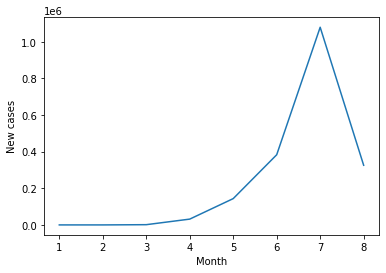

In [44]:
plt.plot(df_month.index,df_month["New cases"])
plt.xlabel('Month')
plt.ylabel('New cases')
plt.show()

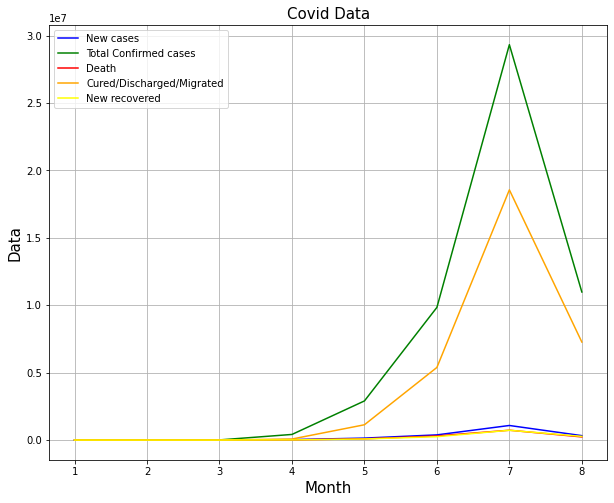

In [45]:
plt.figure(figsize=(10, 8))

plt.plot(df_month.index, df_month["New cases"], label='New cases', color='blue')
plt.plot(df_month.index, df_month["Total Confirmed cases"], label='Total Confirmed cases', color='green')
plt.plot(df_month.index, df_month["Death"], label='Death', color='red')
plt.plot(df_month.index, df_month["Cured/Discharged/Migrated"], label='Cured/Discharged/Migrated', color='orange')
plt.plot(df_month.index, df_month["New recovered"], label='New recovered', color='yellow')

plt.xlabel('Month',fontsize=15)
plt.ylabel('Data',fontsize=15)
plt.title('Covid Data',fontsize=15)

plt.legend()
plt.grid(True)
plt.show()